In [ ]:
%matplotlib inline
import pandas as pd
import matplotlib.pylab as plt
import numpy as np
from collections import defaultdict, Counter

print('\n------------------- Load and print head of dataset-------------\n')
df = pd.read_csv('BreastCancerWisconsin.csv') 
print(df.head())
print('\n------------------- Replace ? by NaN in column A7-------------\n')
df['A7'] = df['A7'].replace('?', np.NaN)
print(df[20:30])
print('\n------------------- Check datatype of columns-------------\n')
print(df.dtypes)
print('\n------------------- converted back to numeric-------------\n')
df['A7'] = pd.to_numeric(df['A7'])
print(df[20:30])

print('\n------------------- Check datatype of columns-------------\n')
print(df.dtypes)

print('\n-------------------Check Null Values and Total Count-------------\n')
# Check for null values\n",
print(pd.isnull(df['A7']).sum())

print('\n-------------------Replace NaN values with the mean of column A7-------------\n')
df = df.fillna(df.mean(skipna=True))
print(df[20:30])

print('\n-------------------Provide the summary statistics-------------\n')
print(df.describe())

print('\n-------------------Find number of columns and number of rows-------------\n')
rows, columns = df.shape
print('Rows:: '+ str(rows) + '\nColumns:: ' + str(columns))

print('\n-------------------Report how many unique id values (column Scn)-------------\n')
print(len(df['Scn'].unique()))

print('\n--------------------Draw histograms for columns A2-A10--------------------\n')

# histogram of colums A2-A7\n",
#df[['A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10']].plot(kind='hist',bins=9,figsize=(12,6))


df.iloc[:, 1:10].plot(kind='hist',bins=9,figsize=(12,6))
plt.tight_layout(rect=(0, 0, 1.2, 1.2)) 




-------------------create a count based on groupby -------------

Benign::458
Malignant::241


Text(0,0.5,'counts of benign and malignant values')

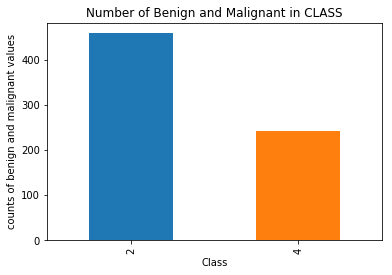

In [58]:
print('\n-------------------create a count based on groupby -------------\n')
benign, malignant = pd.value_counts(df['CLASS'])
print( 'Benign::'+ str(benign) +'\nMalignant::'+str(malignant))

f1 = benign # if you load from dataframe use data['columnname1'].values
f2 = malignant # # if you load from dataframe use data['columnname2'].values
#Make a scater plot with two features

ax = pd.value_counts(df['CLASS']).plot(kind='bar', title="Benign and Malignant in CLASS")
ax.set_xlabel("Class")
ax.set_ylabel("Counts of benign and malignant values")

Text(0,0.5,'Normal Nuclei')

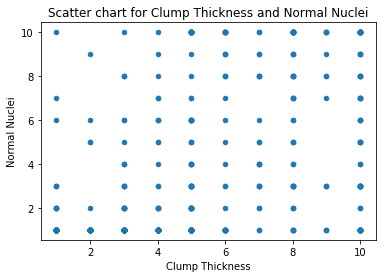

In [6]:
ax =df.plot(kind='scatter', x='A2', y='A9', title="Scatter chart for Clump Thickness and Normal Nuclei")
ax.set_xlabel("Clump Thickness")
ax.set_ylabel("Normal Nuclei")

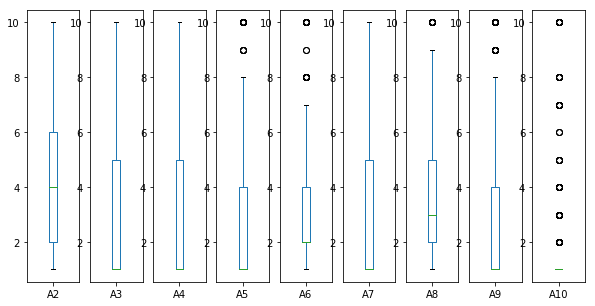

In [9]:
# Graph a box plot to visualize the shape of the distribution, its central value, and its variability
df.iloc[:, 1:10].plot(kind='box',figsize=(10,5),subplots=True)
plt.show()